<a href="https://colab.research.google.com/github/emin-ozturk/Python-ML/blob/main/Hava_S%C4%B1cakl%C4%B1g%CC%86%C4%B1_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Python_Programming_for_Data_Science/Alıştırmalar/Hava Sıcaklığı Analizi"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python_Programming_for_Data_Science/Alıştırmalar/Hava Sıcaklığı Analizi
 environment_temperature_change.csv  'Hava Sıcaklığı Analizi.ipynb'


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("environment_temperature_change.csv", encoding = "ISO-8859-1")
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [75]:
df.shape

(9656, 66)

Toplam Nan sayısı

In [76]:
df.isna().sum().sum()

78103

Kolonlara göre Nan sayıları ve yüzdeleri

In [77]:
nan_col = [col for col in df.columns if df[col].isna().sum() > 0]
print("Kolon\tNan\tYüzde")
for col in nan_col:
  nan = df[col].isna().sum()
  print(f"{col}\t{nan}\t{(nan / df.shape[0] * 100):.2f}")

Kolon	Nan	Yüzde
Y1961	1369	14.18
Y1962	1334	13.82
Y1963	1362	14.11
Y1964	1404	14.54
Y1965	1375	14.24
Y1966	1292	13.38
Y1967	1309	13.56
Y1968	1311	13.58
Y1969	1330	13.77
Y1970	1348	13.96
Y1971	1353	14.01
Y1972	1333	13.80
Y1973	1262	13.07
Y1974	1282	13.28
Y1975	1376	14.25
Y1976	1447	14.99
Y1977	1399	14.49
Y1978	1329	13.76
Y1979	1366	14.15
Y1980	1373	14.22
Y1981	1380	14.29
Y1982	1419	14.70
Y1983	1451	15.03
Y1984	1397	14.47
Y1985	1440	14.91
Y1986	1388	14.37
Y1987	1372	14.21
Y1988	1383	14.32
Y1989	1399	14.49
Y1990	1417	14.67
Y1991	1498	15.51
Y1992	1302	13.48
Y1993	1341	13.89
Y1994	1283	13.29
Y1995	1247	12.91
Y1996	1217	12.60
Y1997	1347	13.95
Y1998	1286	13.32
Y1999	1332	13.79
Y2000	1314	13.61
Y2001	1415	14.65
Y2002	1344	13.92
Y2003	1266	13.11
Y2004	1241	12.85
Y2005	1232	12.76
Y2006	1153	11.94
Y2007	1122	11.62
Y2008	1181	12.23
Y2009	1237	12.81
Y2010	1221	12.64
Y2011	1219	12.62
Y2012	1306	13.53
Y2013	1229	12.73
Y2014	1279	13.25
Y2015	1295	13.41
Y2016	1308	13.55
Y2017	1290	13.36
Y2018	1307	13.5

Kolan silme

In [78]:
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [79]:
df.drop(["Area Code", "Months Code", "Element Code"], axis=1, inplace = True)

In [80]:
df.head()

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


Sadece sıcaklık değerlerini filtreleme

In [81]:
temp_change_df = df[df["Element"] == "Temperature change"]

In [82]:
temp_change_df.head()

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [85]:
print(temp_change_df["Area"].nunique())
print(temp_change_df["Area"].unique())

284
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Christmas Island' 'Cocos (Keeling) Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' '

In [137]:
months = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December"]
tr_df = temp_change_df[(temp_change_df["Area"] == "Turkey") & (temp_change_df["Months"].isin(months))]
tr_df.head()

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
7582,Turkey,January,Temperature change,°C,0.102,0.960,2.313,-4.267,0.321,3.170,...,2.982,1.366,-0.496,1.462,2.917,0.952,0.114,-1.316,2.668,1.391
7584,Turkey,February,Temperature change,°C,-0.806,-0.062,2.524,-1.384,-1.528,3.650,...,3.414,0.403,-2.720,2.655,2.771,1.508,4.446,0.070,4.063,1.922
7586,Turkey,March,Temperature change,°C,-1.140,2.456,-1.664,0.561,0.703,1.118,...,2.652,0.582,-1.784,2.133,2.714,1.348,2.549,2.068,4.580,1.241
7588,Turkey,April,Temperature change,°C,1.235,-0.273,-0.519,-0.804,-1.183,1.306,...,0.911,-0.646,2.294,1.679,2.029,-0.707,3.267,0.470,3.322,-0.222
7590,Turkey,May,Temperature change,°C,0.849,0.916,-1.222,-1.227,-0.574,-0.503,...,1.494,-0.449,1.129,2.483,0.939,1.056,0.624,0.568,2.523,2.169


In [138]:
tr_df.shape

(12, 63)

Aylara göre ortalama sıcaklıklar

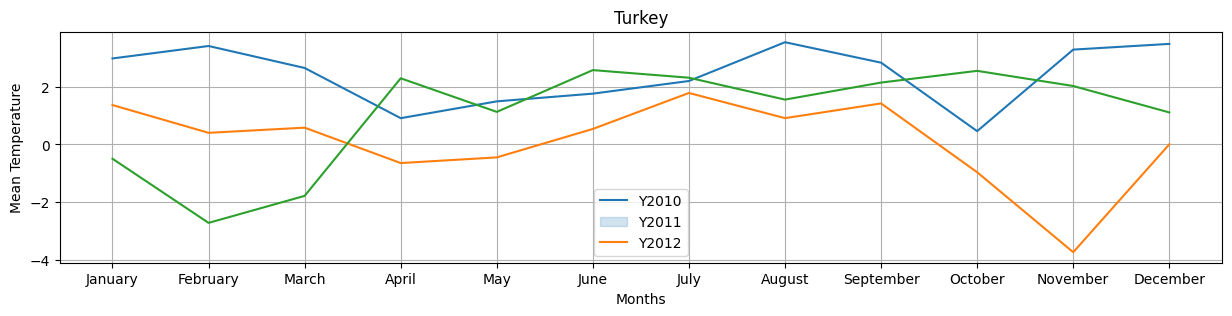

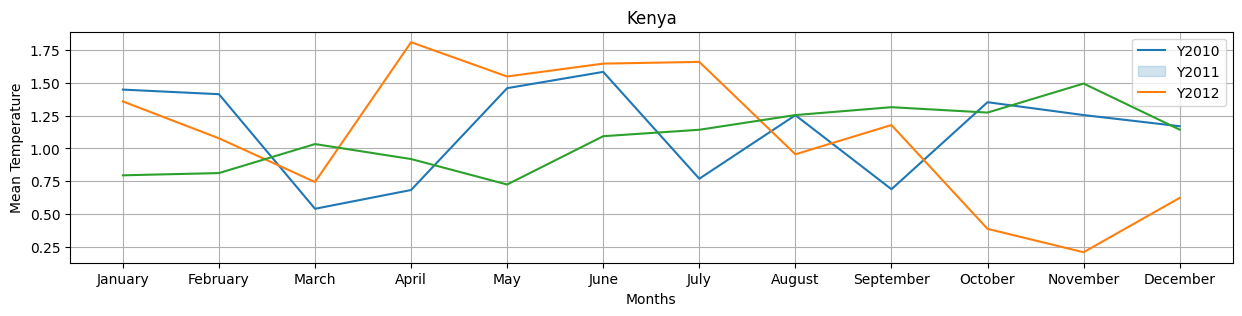

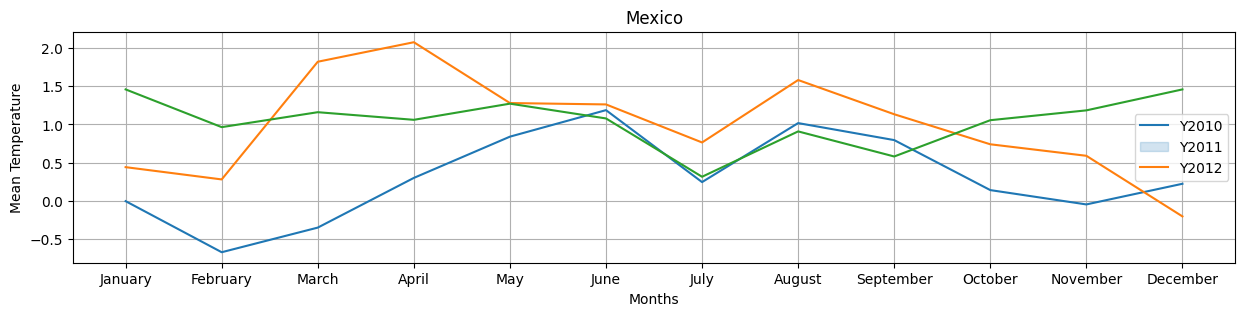

In [145]:
months = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December"]
areas = ["Turkey", "Kenya", "Mexico"]
years = ["Y2010", "Y2011", "Y2012"]

for area in areas:
  plt.figure(figsize = (15, 3))
  area_df = temp_change_df[(temp_change_df["Area"] == area) & (temp_change_df["Months"].isin(months))]

  for year in years:
    sns.lineplot(x = "Months", y = year, data = area_df)

  plt.legend(years)
  plt.grid(True)
  plt.title(area)
  plt.xlabel("Months")
  plt.ylabel("Mean Temperature")
  plt.show()


Yıllara göre ortalama sıcaklıklar

In [146]:
temp_change_df.head()

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [153]:
months = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December"]
temp_change_df = temp_change_df[temp_change_df["Months"].isin(months)]
temp_change_df.head()

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


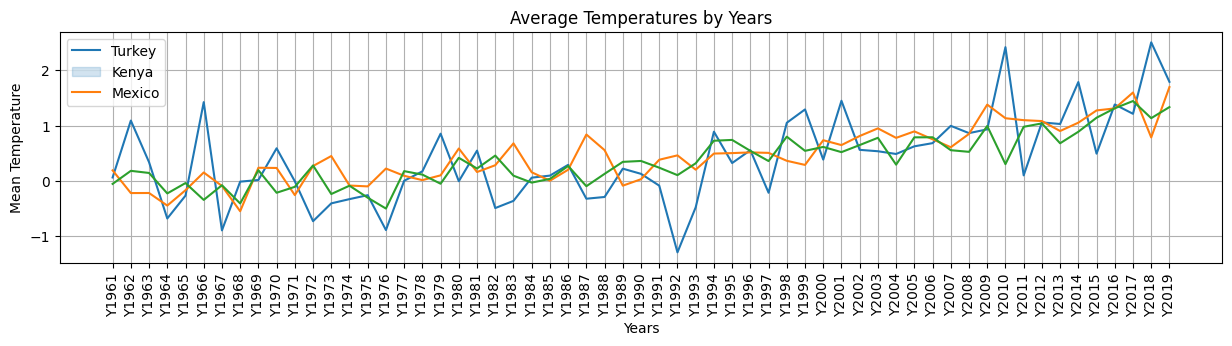

In [171]:
areas = ["Turkey", "Kenya", "Mexico"]
plt.figure(figsize = (15, 3))

for area in areas:
  area = temp_change_df[temp_change_df["Area"] == area]
  area_years = area.iloc[:, 4:]
  temperatures = []
  for col in area_years.columns:
    temperatures.append(area_years[col].mean())

  sns.lineplot(x = area_years.columns, y = temperatures)

plt.xticks(rotation=90)
plt.legend(areas)
plt.grid(True)
plt.title("Average Temperatures by Years")
plt.xlabel("Years")
plt.ylabel("Mean Temperature")
plt.show()